## Linear model classifiers
***

In [1]:
from sklearn import datasets

import numpy as np

import matplotlib.pyplot as plt

from utils.data_operation import accuracy_score
from utils.data_manipulation import make_diagonal, normalize, train_test_split
from deep_learning.activation_functions import Sigmoid
from supervised_learning.linear_models.linear_classifiers import LogisticRegression, RidgeClassifier

from utils.misc import Plot

%load_ext autoreload
%autoreload 2

In [2]:
data = datasets.load_iris()
X = normalize(data.data[data.target != 0])
y = data.target[data.target != 0]
y_LR = np.copy(y)
y_RR = np.copy(y)

y_LR[y_LR == 1] = 0
y_LR[y_LR == 2] = 1
y_RR[y_RR == 1] = -1
y_RR[y_RR == 2] = 1

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y_LR, test_size=0.33, seed=1)
X_train_RR, X_test_RR, y_train_RR, y_test_RR = train_test_split(X, y_RR, test_size=0.33, seed=1)

In [3]:
LR_clf = LogisticRegression(gradient_descent=True)
LR_clf.fit(X_train_LR, y_train_LR)
y_pred_LR = LR_clf.predict(X_test_LR)

RR_clf = RidgeClassifier(reg_factor=0.01, gradient_descent=True)
RR_clf.fit(X_train_RR, y_train_RR)
y_pred_RR = RR_clf.predict(X_test_RR)

In [4]:
accuracy_LR = accuracy_score(y_test_LR, y_pred_LR)
print("Accuracy LR: ", accuracy_LR)

accuracy_RR = accuracy_score(y_test_RR, y_pred_RR)
print("Accuracy RR: ", accuracy_RR)

Accuracy LR:  0.9393939393939394
Accuracy RR:  0.5151515151515151


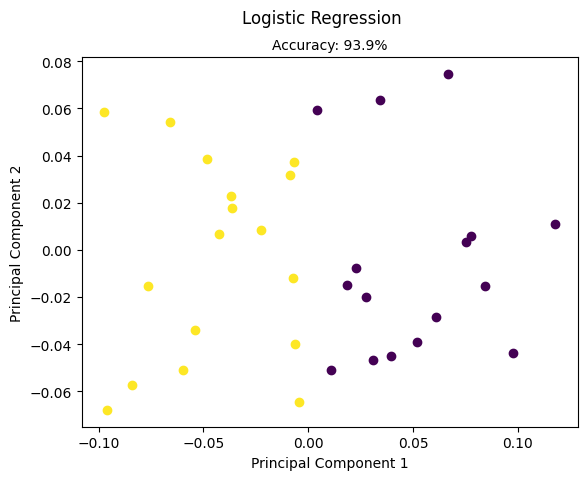

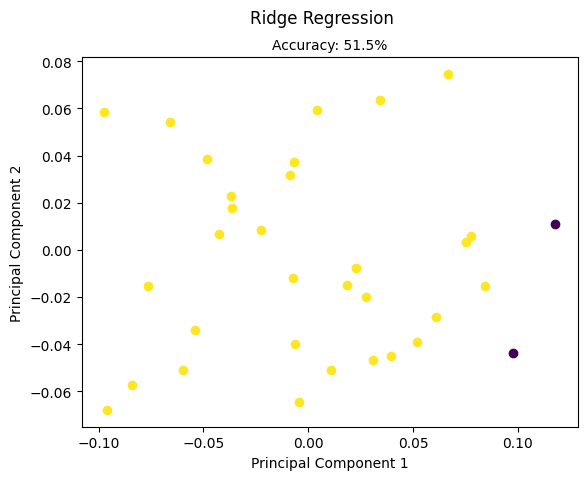

In [5]:
Plot().plot_in_2d(X_test_LR, y_pred_LR,title="Logistic Regression", accuracy=accuracy_LR)
Plot().plot_in_2d(X_test_RR, y_pred_RR,title="Ridge Regression", accuracy=accuracy_RR)